# 1.0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")

%matplotlib inline

# 2.0 EDA

## 2.1 Reading Data

In [2]:
df = pd.read_csv("student_marks.csv")

df.head()

,Midterm mark,Final mark
0,32.5,31.7
1,53.4,68.8
2,61.5,62.6
3,47.5,71.5
4,59.8,87.2


## 2.2 Description from Data

In [3]:
df.describe()

,Midterm mark,Final mark
count,100.000000,100.000000
mean,48.959000,72.735000
std,9.746495,16.658249
min,25.100000,31.700000
25%,41.550000,60.775000
50%,49.600000,72.150000
75%,56.750000,83.175000
max,70.300000,118.600000


## 2.3 Ploting Data + Initial Linear Regression

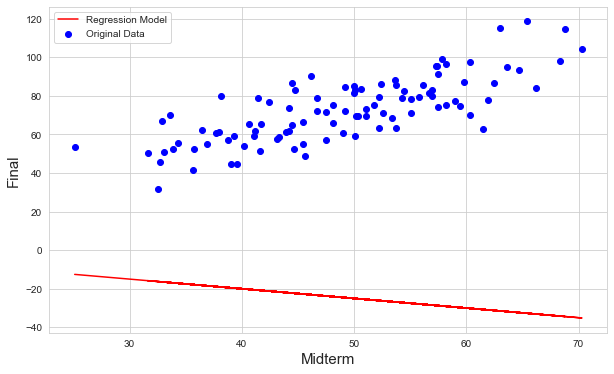

In [4]:
plt.figure(figsize = (10,6))

x = df["Midterm mark"]
y = df["Final mark"]

m = -0.5
b = 0

plt.scatter( x , y, c = "blue", label = "Original Data" )
plt.plot(x, m*x + b, c = "red", label = "Regression Model" )

plt.legend()
plt.xlabel ( "Midterm", fontsize= 15 )
plt.ylabel( "Final", fontsize = 15 )
plt.show()

## 2.4 Helper Functions

### 2.4.1 Mean 

In [5]:
def data_mean( df ):
    
    return [ df['Midterm mark'].values.mean(), df['Final mark'].values.mean() ]

### 2.4.2 Standard Deviation

In [6]:
def data_std ( df ):
    
    return [ df['Midterm mark'].values.std(), df['Final mark'].values.std() ]

### 2.4.3 Data Standardization

In [7]:
def standardize_data ( df, mean, std ):
    
    df_temp = df.copy()

    x = df_temp ["Midterm mark"].values
    y = df_temp ["Final mark"].values
    
    df_temp ["Midterm mark"] = ( x - mean[0] ) / std[0]
    
    df_temp ["Final mark"] = ( y - mean[1] ) / std[1]
    
    return df_temp

### 2.4.4 Data Plotter

In [8]:
def data_plotter ( x, y , m, b ):
    
    plt.figure(figsize = (10,6))

    plt.scatter( x , y, c = "blue", label = "Original Data" )
    plt.plot(x, m*x + b, c = "red", label = "Regression Model" )

    plt.legend()
    plt.title("Final vs Midterm marks", fontsize = 18)
    plt.xlabel ( "Midterm", fontsize= 15 )
    plt.ylabel( "Final", fontsize = 15 )
    plt.show()

### 2.4.5 Cost Plotter

In [9]:
def cost_plotter (x , y):
    
    plt.figure(figsize = (10,6))

    plt.plot(x, y, c = "red")

    plt.title("Error along Iterations", fontsize = 18)
    plt.xlabel ( "Iterations", fontsize= 15 )
    plt.ylabel( "Error", fontsize = 15 )
    plt.show()

# 3.0 Linear Regression

## 3.1 Helper Functions

### 3.1.1 Cost

In [10]:
def mean_squared_error ( df, m, b):

    x = df ["Midterm mark"].values
    y = df ["Final mark"].values

    return np.sum( np.power(y - (m * x + b), 2 ) ) / len(x)

### 3.1.2 partial derivatives

In [11]:
def partial_derivatives ( df, m, b ):
    
    x = df ["Midterm mark"].values
    y = df ["Final mark"].values
    
    dm = np.sum( -x * (y - (m*x + b) ) )*2/len(x)
    
    db = np.sum( -1 * (y - (m*x + b) ) )*2/len(x)
    
    return [dm, db]

### 3.1.3 Gradient Descent

In [12]:
def gradient_descent ( df, m, b, learning_rate, num_iterations ):
    
    iterations = []
    costs = []
    
    for i in range ( num_iterations ):
        
        derivative_m, derivative_b = partial_derivatives (df, m, b)
        
        m = m - ( learning_rate * derivative_m )
        
        b = b - ( learning_rate * derivative_b )
                
        cost = mean_squared_error (df, m, b)
        
        iterations.append ( i+1 )
        costs.append ( cost )
        
    return iterations, costs, m, b

## 3.2 Linear Regression

### 3.2.1 Custom Model 

In [13]:
def linear_regression ( df, m, b, learning_rate, num_iterations, normalize ):
    
    df_temp = df.copy()

    mean = data_mean( df_temp )
    std = data_std ( df_temp )
    
    if normalize == True:
        
        df_temp = standardize_data (df_temp, mean, std)
                    
    iterations, costs, m, b = gradient_descent (df_temp, m, b, learning_rate, num_iterations)

    df_temp_2 = df_temp.copy()
                    
    x = df_temp_2 ["Midterm mark"]
    y = df_temp_2 ["Final mark"]
    
    print(f"coefficient: {m}, intercept: {b}, error {costs[-1]}")
    data_plotter (x, y, m, b)
    cost_plotter (iterations, costs)

**Case #1:** Unstandardized data + learning rate = 0.0001 + number of iterations = 100

coefficient: 1.4785727560143909, intercept: 0.04490536397288713, error 112.76072247561237


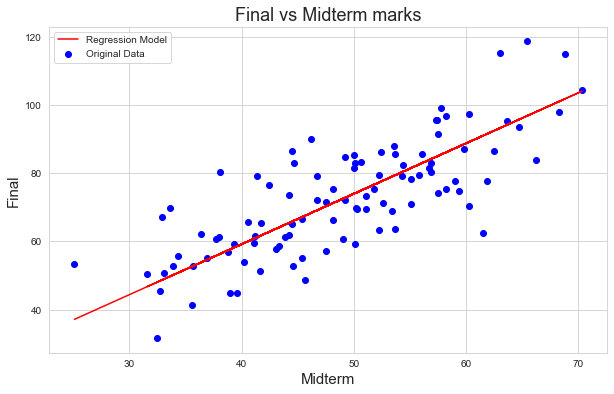

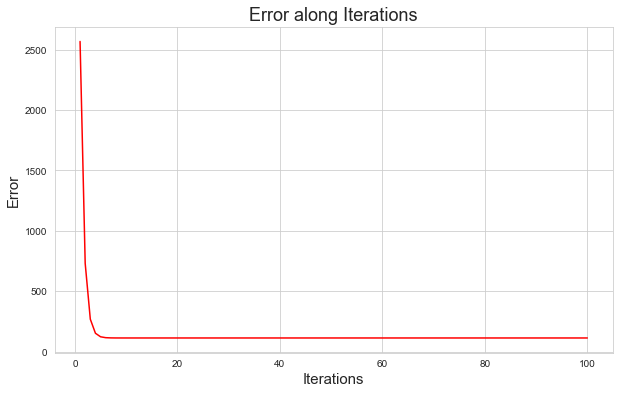

In [14]:
m = -0.5
b = 0

learning_rate = 0.0001
num_iterations = 100

linear_regression(df, m, b, learning_rate, num_iterations, normalize = False)

**Case #2:** standardized data + learning rate = 0.0001 + number of iterations = 100

coefficient: -0.4747809463889036, intercept: -2.3439028495886304e-18, error 1.9598823170828026


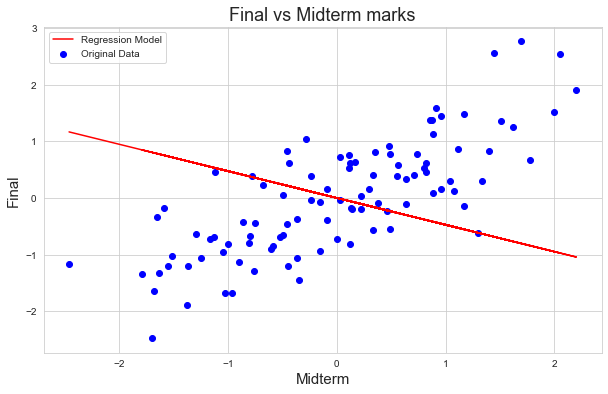

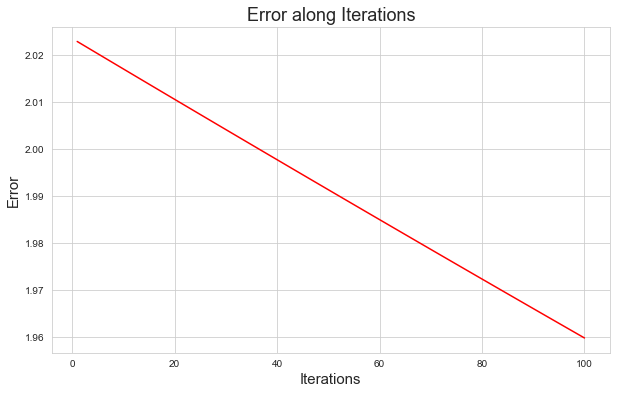

In [15]:
m = -0.5
b = 0
learning_rate = 0.0001
num_iterations = 100

linear_regression(df, m, b, learning_rate, num_iterations, normalize= True)

**Case #3:** unstandardized data + learning rate = 0.0001 + number of iterations = 2000

coefficient: 1.4763433036607632, intercept: 0.1583379070844271, error 112.69297466342678


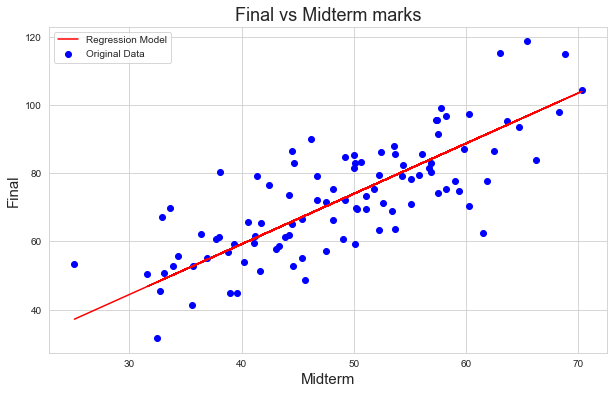

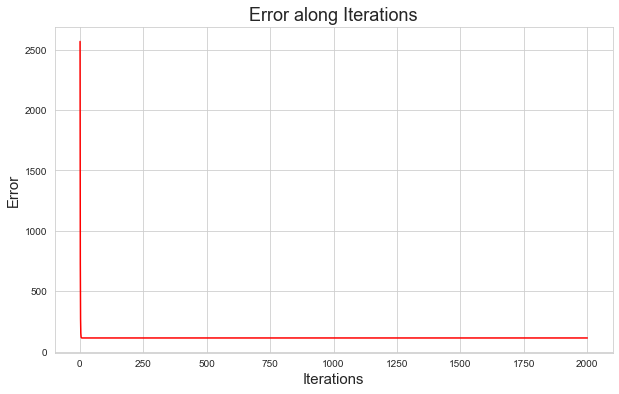

In [16]:
m = -0.5
b = 0
learning_rate = 0.0001
num_iterations = 2000

linear_regression(df, m, b, learning_rate, num_iterations, normalize = False)

**Case #4:** standardized data + learning rate = 0.0001 + number of iterations = 2000

coefficient: -0.08012563486637693, intercept: -1.8273826896120235e-17, error 1.130370971980073


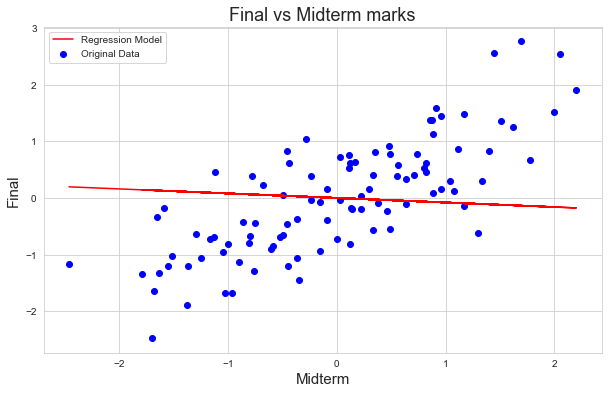

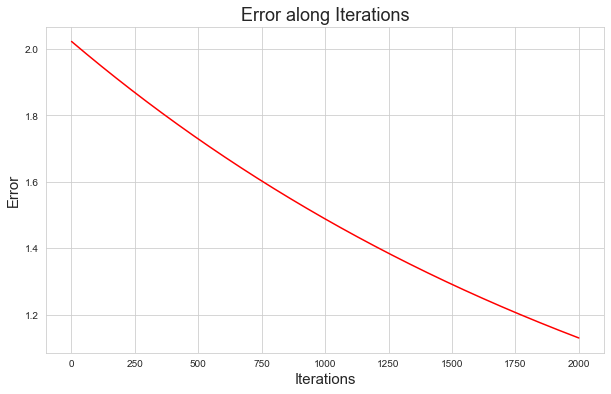

In [17]:
m = -0.5
b = 0
learning_rate = 0.0001
num_iterations = 2000

linear_regression(df, m, b, learning_rate, num_iterations, normalize= True)

**Case #5:** Unstandardized data + learning rate = 0.1 + number of iterations = 100

coefficient: -9.263695270230237e+269, intercept: -1.820726808813385e+268, error inf


<ipython-input-10-bc47feec935d>:6: RuntimeWarning: overflow encountered in power
  return np.sum( np.power(y - (m * x + b), 2 ) ) / len(x)


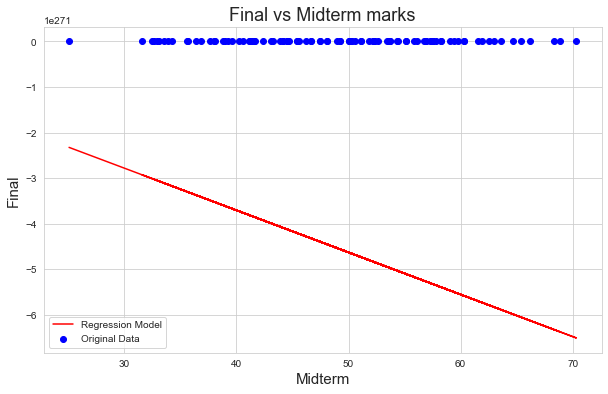

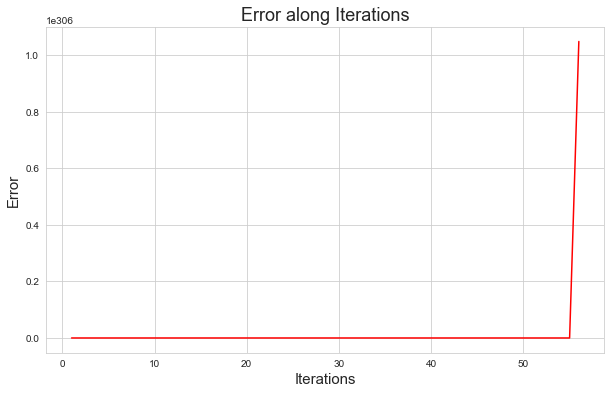

In [18]:
m = -0.5
b = 0
learning_rate = 0.1
num_iterations = 100

linear_regression(df, m, b, learning_rate, num_iterations, normalize = False)

**Case #6:** standardized data + learning rate = 0.1 + number of iterations = 100

coefficient: 0.7734781433087615, intercept: 2.5124347047267306e-16, error 0.4017315614223312


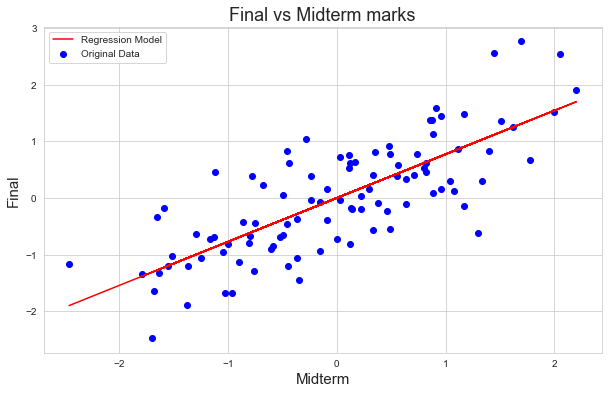

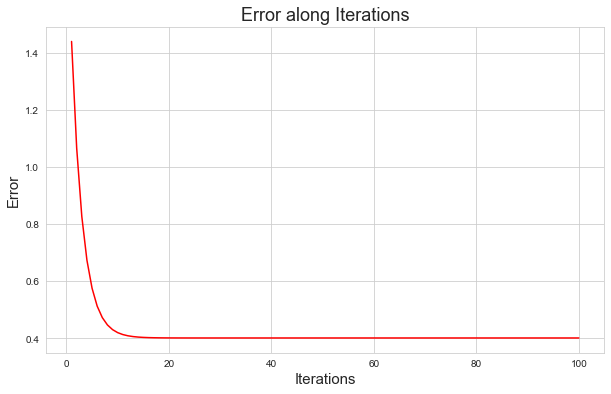

In [19]:
m = -0.5
b = 0
learning_rate = 0.1
num_iterations = 100

linear_regression(df, m, b, learning_rate, num_iterations, normalize = True)

**Case #7:** Unstandardized data + learning rate = 0.1 + number of iterations = 2000

<ipython-input-10-bc47feec935d>:6: RuntimeWarning: overflow encountered in power
  return np.sum( np.power(y - (m * x + b), 2 ) ) / len(x)
<ipython-input-11-4a5447586b57>:6: RuntimeWarning: overflow encountered in multiply
  dm = np.sum( -x * (y - (m*x + b) ) )*2/len(x)
D:\Program Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-12-cf9d1cc44ddc>:10: RuntimeWarning: invalid value encountered in double_scalars
  m = m - ( learning_rate * derivative_m )
<ipython-input-12-cf9d1cc44ddc>:12: RuntimeWarning: invalid value encountered in double_scalars
  b = b - ( learning_rate * derivative_b )


coefficient: nan, intercept: nan, error nan


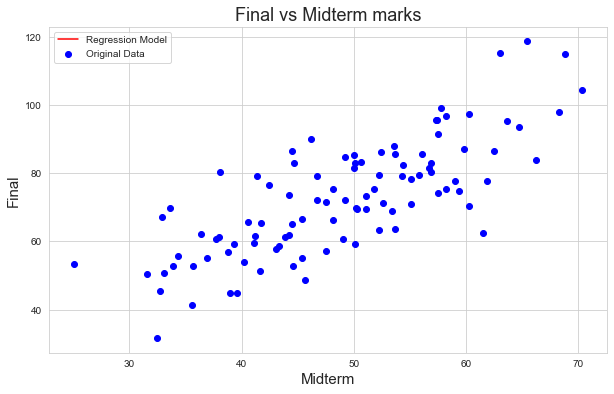

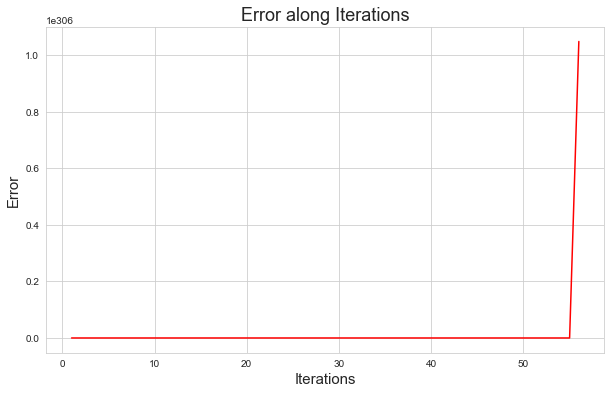

In [20]:
m = -0.5
b = 0
learning_rate = 0.1
num_iterations = 2000

linear_regression(df, m, b, learning_rate, num_iterations, normalize = False)

**Case #8:** standardized data + learning rate = 0.1 + number of iterations = 2000

coefficient: 0.7734781435681735, intercept: 2.7278179715038305e-16, error 0.40173156142233124


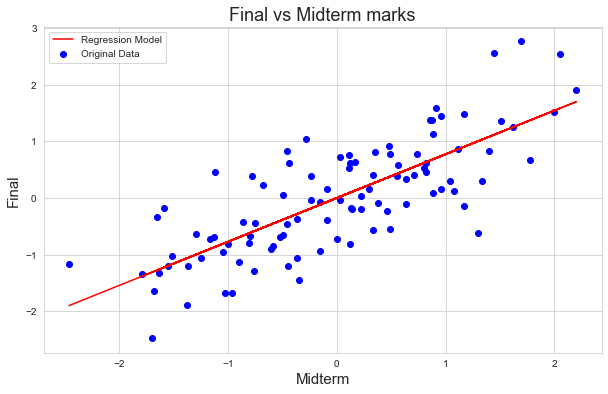

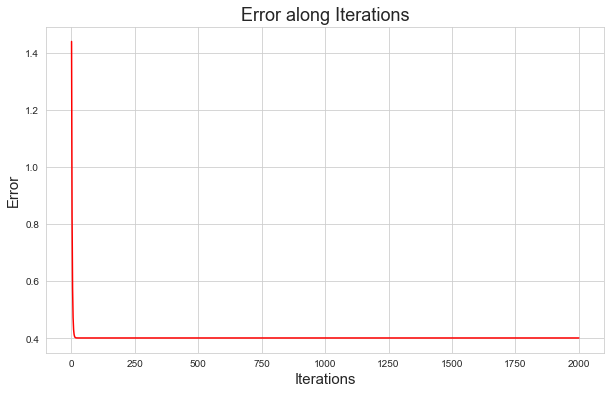

In [21]:
m = -0.5
b = 0
learning_rate = 0.1
num_iterations = 2000

linear_regression(df, m, b, learning_rate, num_iterations, normalize = True)

###  3.2.2 Built-in Functions (Scikit-Learn)

coefficient: 0.7734781435681733, intercept: 2.5515431945611563e-16, error 0.5982684385776686


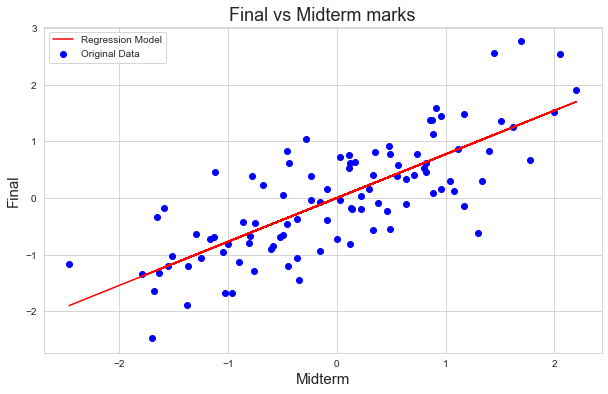

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

x = df.iloc[:,0:1]
y = df.iloc[:,1:]

x = scale.fit_transform(x) 
y = scale.fit_transform(y) 

reg = LinearRegression()

reg.fit(x, y)
    
m, b, cost = reg.coef_[0][0], reg.intercept_[0],reg.score(x,y)

print(f"coefficient: {m}, intercept: {b}, error {cost}")

data_plotter (x, y, m, b)